In [399]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import geopandas as gpd

# Ładowanie danych - GUS

In [400]:
df = pd.read_csv('data_crimes.csv',sep=";", quotechar='"')

print(df)

                  Nazwa  1 kwartał;przestępstwa stwierdzone;ogółem;2016;[-]  \
0                POLSKA                                             181162    
1          DOLNOŚLĄSKIE                                              17437    
2    KUJAWSKO-POMORSKIE                                               8804    
3             LUBELSKIE                                               6655    
4              LUBUSKIE                                               6037    
5               ŁÓDZKIE                                              10733    
6           MAŁOPOLSKIE                                              18748    
7           MAZOWIECKIE                                              24765    
8              OPOLSKIE                                               4157    
9          PODKARPACKIE                                               4826    
10            PODLASKIE                                               4114    
11            POMORSKIE                             

# Preprocessing

### Zmienianie kolumn na wiersze

In [401]:
for i, col in enumerate(df.columns):
    print(f"{i}: {col}")

0: Nazwa
1: 1 kwartał;przestępstwa stwierdzone;ogółem;2016;[-]
2: 1 kwartał;przestępstwa stwierdzone;ogółem;2017;[-]
3: 1 kwartał;przestępstwa stwierdzone;ogółem;2018;[-]
4: 1 kwartał;przestępstwa stwierdzone;ogółem;2019;[-]
5: 1 kwartał;przestępstwa stwierdzone;ogółem;2020;[-]
6: 1 kwartał;przestępstwa stwierdzone;ogółem;2021;[-]
7: 1 kwartał;przestępstwa stwierdzone;ogółem;2022;[-]
8: 1 kwartał;przestępstwa stwierdzone;ogółem;2023;[-]
9: 1 kwartał;przestępstwa stwierdzone;ogółem;2024;[-]
10: 1 kwartał;przestępstwa stwierdzone;o charakterze kryminalnym;2016;[-]
11: 1 kwartał;przestępstwa stwierdzone;o charakterze kryminalnym;2017;[-]
12: 1 kwartał;przestępstwa stwierdzone;o charakterze kryminalnym;2018;[-]
13: 1 kwartał;przestępstwa stwierdzone;o charakterze kryminalnym;2019;[-]
14: 1 kwartał;przestępstwa stwierdzone;o charakterze kryminalnym;2020;[-]
15: 1 kwartał;przestępstwa stwierdzone;o charakterze kryminalnym;2021;[-]
16: 1 kwartał;przestępstwa stwierdzone;o charakterze kryminal

In [402]:
df_long = df.melt(id_vars=['Nazwa'],    #zostawiamy
                  var_name='Okres',     #Nowa Kolumna
                  value_name='Liczba')  #Kolumna dla wartości

df_long

,Nazwa,Okres,Liczba
0,POLSKA,1 kwartał;przestępstwa stwierdzone;ogółem;2016...,181162.0
1,DOLNOŚLĄSKIE,1 kwartał;przestępstwa stwierdzone;ogółem;2016...,17437.0
2,KUJAWSKO-POMORSKIE,1 kwartał;przestępstwa stwierdzone;ogółem;2016...,8804.0
3,LUBELSKIE,1 kwartał;przestępstwa stwierdzone;ogółem;2016...,6655.0
4,LUBUSKIE,1 kwartał;przestępstwa stwierdzone;ogółem;2016...,6037.0
...,...,...,...
10399,ŚLĄSKIE,rok;przestępstwa stwierdzone;z ustawy o przeci...,4876.0
10400,ŚWIĘTOKRZYSKIE,rok;przestępstwa stwierdzone;z ustawy o przeci...,1271.0
10401,WARMIŃSKO-MAZURSKIE,rok;przestępstwa stwierdzone;z ustawy o przeci...,4404.0
10402,WIELKOPOLSKIE,rok;przestępstwa stwierdzone;z ustawy o przeci...,7953.0


In [403]:
column_parts = df_long['Okres'].str.split(';', expand=True)
column_parts

,0,1,2,3,4
0,1 kwartał,przestępstwa stwierdzone,ogółem,2016,[-]
1,1 kwartał,przestępstwa stwierdzone,ogółem,2016,[-]
2,1 kwartał,przestępstwa stwierdzone,ogółem,2016,[-]
3,1 kwartał,przestępstwa stwierdzone,ogółem,2016,[-]
4,1 kwartał,przestępstwa stwierdzone,ogółem,2016,[-]
...,...,...,...,...,...
10399,rok,przestępstwa stwierdzone,z ustawy o przeciwdziałaniu narkomanii,2024,[-]
10400,rok,przestępstwa stwierdzone,z ustawy o przeciwdziałaniu narkomanii,2024,[-]
10401,rok,przestępstwa stwierdzone,z ustawy o przeciwdziałaniu narkomanii,2024,[-]
10402,rok,przestępstwa stwierdzone,z ustawy o przeciwdziałaniu narkomanii,2024,[-]


In [404]:
df_long['Kwartał'] = column_parts[0] 
df_long['Przestępstwo'] = column_parts[2]
df_long['Rok'] = column_parts[3]
df_long['Województwo'] = df_long['Nazwa']

# Final DataFrame
df_final = df_long[['Województwo', 'Przestępstwo', 'Kwartał', 'Rok', 'Liczba']]

# Sorting
df_final = df_final.sort_values(['Rok', 'Kwartał'])


df_final.head(15)

,Województwo,Przestępstwo,Kwartał,Rok,Liczba
0,POLSKA,ogółem,1 kwartał,2016,181162.0
1,DOLNOŚLĄSKIE,ogółem,1 kwartał,2016,17437.0
2,KUJAWSKO-POMORSKIE,ogółem,1 kwartał,2016,8804.0
3,LUBELSKIE,ogółem,1 kwartał,2016,6655.0
4,LUBUSKIE,ogółem,1 kwartał,2016,6037.0
5,ŁÓDZKIE,ogółem,1 kwartał,2016,10733.0
6,MAŁOPOLSKIE,ogółem,1 kwartał,2016,18748.0
7,MAZOWIECKIE,ogółem,1 kwartał,2016,24765.0
8,OPOLSKIE,ogółem,1 kwartał,2016,4157.0
9,PODKARPACKIE,ogółem,1 kwartał,2016,4826.0


In [405]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10404 entries, 0 to 10403
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Województwo   10404 non-null  object 
 1   Przestępstwo  10404 non-null  object 
 2   Kwartał       10404 non-null  object 
 3   Rok           10404 non-null  object 
 4   Liczba        7684 non-null   float64
dtypes: float64(1), object(4)
memory usage: 487.7+ KB


In [406]:
df_final["Rok"] = df_final["Rok"].astype(int)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10404 entries, 0 to 10403
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Województwo   10404 non-null  object 
 1   Przestępstwo  10404 non-null  object 
 2   Kwartał       10404 non-null  object 
 3   Rok           10404 non-null  int64  
 4   Liczba        7684 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 487.7+ KB


### Usuwanie przestępstw łączonych ("razem")

In [407]:
df_final['Przestępstwo'].unique()

array(['ogółem', 'o charakterze kryminalnym',
       'o charakterze gospodarczym',
       'przeciwko bezpieczeństwu powszechnemu i bezpieczeństwu w komunikacji razem',
       'przeciwko bezpieczeństwu powszechnemu i bezpieczeństwu w komunikacji - drogowe',
       'przeciwko życiu i zdrowiu', 'przeciwko mieniu',
       'przeciwko wolności, wolności sumienia, wolności seksualnej i obyczajności razem',
       'przeciwko wolności i wolności sumienia razem',
       'przeciwko wolności', 'przeciwko rodzinie i opiece',
       'przeciwko działalności instytucji państwowych oraz samorządu terytorialnego',
       'przeciwko wymiarowi sprawiedliwości',
       'przeciwko wiarygodności dokumentów',
       'przeciwko obrotowi gospodarczemu',
       'przeciwko obrotowi pieniędzmi i papierami wartościowymi',
       'z ustawy o przeciwdziałaniu narkomanii'], dtype=object)

In [408]:
df_final = df_final[ ~df_final['Przestępstwo'].str.contains("razem", case=False, na=False)]
df_final['Przestępstwo'].unique()

array(['ogółem', 'o charakterze kryminalnym',
       'o charakterze gospodarczym',
       'przeciwko bezpieczeństwu powszechnemu i bezpieczeństwu w komunikacji - drogowe',
       'przeciwko życiu i zdrowiu', 'przeciwko mieniu',
       'przeciwko wolności', 'przeciwko rodzinie i opiece',
       'przeciwko działalności instytucji państwowych oraz samorządu terytorialnego',
       'przeciwko wymiarowi sprawiedliwości',
       'przeciwko wiarygodności dokumentów',
       'przeciwko obrotowi gospodarczemu',
       'przeciwko obrotowi pieniędzmi i papierami wartościowymi',
       'z ustawy o przeciwdziałaniu narkomanii'], dtype=object)

In [409]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8568 entries, 0 to 10403
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Województwo   8568 non-null   object 
 1   Przestępstwo  8568 non-null   object 
 2   Kwartał       8568 non-null   object 
 3   Rok           8568 non-null   int64  
 4   Liczba        6392 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 401.6+ KB


In [410]:
pd.isnull(df_final).sum()

Województwo        0
Przestępstwo       0
Kwartał            0
Rok                0
Liczba          2176
dtype: int64

### Obliczanie kwartałów

In [411]:
df_final["Kwartał"].unique()

array(['1 kwartał', '1-3 kwartały', 'pierwsze półrocze', 'rok'],
      dtype=object)

In [412]:
#Wyodrębienie okresów czasu, aby obliczyć wszystkie kwartały

Q1 = df_final[df_final["Kwartał"] == "1 kwartał"]
Q12 = df_final[df_final["Kwartał"] == "pierwsze półrocze"]
Q13 =  df_final[df_final["Kwartał"] == "1-3 kwartały"]
Y =  df_final[df_final["Kwartał"] == "rok"]

#Kwartał 2
Q2 = pd.merge(
    Q1, Q12,
    on=["Województwo", "Przestępstwo", "Rok"],
    suffixes=("_Q1", "_Q12")
)

Q2["Liczba"] = Q2["Liczba_Q12"] - Q2["Liczba_Q1"]
Q2["Kwartał"] = "2 kwartał"
Q2= Q2.drop(["Kwartał_Q1", "Liczba_Q1", "Kwartał_Q12", "Liczba_Q12"], axis=1)




#Kwartał 3
Q3 = pd.merge(
    Q12, Q13,
    on=["Województwo", "Przestępstwo", "Rok"],
    suffixes=("_Q12", "_Q13")
)

Q3["Liczba"] = Q3["Liczba_Q13"] - Q3["Liczba_Q12"]
Q3["Kwartał"] = "3 kwartał"
Q3= Q3.drop(["Kwartał_Q12", "Liczba_Q12", "Kwartał_Q13", "Liczba_Q13"], axis=1)


#Kwartał 4
Q4 = pd.merge(
    Q13, Y,
    on=["Województwo", "Przestępstwo", "Rok"],
    suffixes=("_Q13", "_Y")
)

Q4["Liczba"] = Q4["Liczba_Y"] - Q4["Liczba_Q13"]
Q4["Kwartał"] = "4 kwartał"
Q4= Q4.drop(["Kwartał_Q13", "Liczba_Q13", "Kwartał_Y", "Liczba_Y"], axis=1)

df_final = pd.concat([df_final, Q2, Q3, Q4], ignore_index=True)
df_final

,Województwo,Przestępstwo,Kwartał,Rok,Liczba
0,POLSKA,ogółem,1 kwartał,2016,181162.0
1,DOLNOŚLĄSKIE,ogółem,1 kwartał,2016,17437.0
2,KUJAWSKO-POMORSKIE,ogółem,1 kwartał,2016,8804.0
3,LUBELSKIE,ogółem,1 kwartał,2016,6655.0
4,LUBUSKIE,ogółem,1 kwartał,2016,6037.0
...,...,...,...,...,...
14989,ŚLĄSKIE,z ustawy o przeciwdziałaniu narkomanii,4 kwartał,2024,1168.0
14990,ŚWIĘTOKRZYSKIE,z ustawy o przeciwdziałaniu narkomanii,4 kwartał,2024,356.0
14991,WARMIŃSKO-MAZURSKIE,z ustawy o przeciwdziałaniu narkomanii,4 kwartał,2024,429.0
14992,WIELKOPOLSKIE,z ustawy o przeciwdziałaniu narkomanii,4 kwartał,2024,1454.0


In [413]:
df_final["Kwartał"].unique()

array(['1 kwartał', '1-3 kwartały', 'pierwsze półrocze', 'rok',
       '2 kwartał', '3 kwartał', '4 kwartał'], dtype=object)

In [414]:
df_final = df_final[ ~df_final['Kwartał'].str.contains("pierwsze półrocze|1-3 kwartały", case=False, na=False)]
df_final['Kwartał'].unique()

array(['1 kwartał', 'rok', '2 kwartał', '3 kwartał', '4 kwartał'],
      dtype=object)

In [415]:
mapa_kwartał = {
    "1 kwartał": 1,
    "2 kwartał": 2,
    "3 kwartał": 3,
    "4 kwartał": 4,
    "rok": 0
}

df_final["Kwartał"] = df_final["Kwartał"].map(mapa_kwartał)

C:\Users\Wiola\AppData\Local\Temp\ipykernel_10136\1067151899.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final["Kwartał"] = df_final["Kwartał"].map(mapa_kwartał)


In [416]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10710 entries, 0 to 14993
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Województwo   10710 non-null  object 
 1   Przestępstwo  10710 non-null  object 
 2   Kwartał       10710 non-null  int64  
 3   Rok           10710 non-null  int64  
 4   Liczba        7990 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 502.0+ KB


### Label Encoding

In [417]:
le = LabelEncoder()
df_final['Przestępstwo_ID'] = le.fit_transform(df_final['Przestępstwo'])
df_final['Województwo_ID'] = le.fit_transform(df_final['Województwo'])

C:\Users\Wiola\AppData\Local\Temp\ipykernel_10136\211601003.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Przestępstwo_ID'] = le.fit_transform(df_final['Przestępstwo'])
C:\Users\Wiola\AppData\Local\Temp\ipykernel_10136\211601003.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Województwo_ID'] = le.fit_transform(df_final['Województwo'])


In [418]:
id_map = df_final[['Przestępstwo_ID', 'Przestępstwo']].drop_duplicates().sort_values('Przestępstwo_ID')
id_map

,Przestępstwo_ID,Przestępstwo
34,0,o charakterze gospodarczym
17,1,o charakterze kryminalnym
0,2,ogółem
51,3,przeciwko bezpieczeństwu powszechnemu i bezpie...
136,4,przeciwko działalności instytucji państwowych ...
85,5,przeciwko mieniu
187,6,przeciwko obrotowi gospodarczemu
204,7,przeciwko obrotowi pieniędzmi i papierami wart...
119,8,przeciwko rodzinie i opiece
170,9,przeciwko wiarygodności dokumentów


In [419]:
id_map = df_final[['Województwo_ID', 'Województwo']].drop_duplicates().sort_values('Województwo_ID')
id_map

,Województwo_ID,Województwo
1,0,DOLNOŚLĄSKIE
2,1,KUJAWSKO-POMORSKIE
3,2,LUBELSKIE
4,3,LUBUSKIE
7,4,MAZOWIECKIE
6,5,MAŁOPOLSKIE
8,6,OPOLSKIE
9,7,PODKARPACKIE
10,8,PODLASKIE
0,9,POLSKA


### Missing values

In [420]:
df_null = df_final[df_final.isnull().any(axis=1)]
df_null

,Województwo,Przestępstwo,Kwartał,Rok,Liczba,Przestępstwo_ID,Województwo_ID
102,POLSKA,przeciwko wolności,1,2016,NaN,10,9
103,DOLNOŚLĄSKIE,przeciwko wolności,1,2016,NaN,10,0
104,KUJAWSKO-POMORSKIE,przeciwko wolności,1,2016,NaN,10,1
105,LUBELSKIE,przeciwko wolności,1,2016,NaN,10,2
106,LUBUSKIE,przeciwko wolności,1,2016,NaN,10,3
...,...,...,...,...,...,...,...
13799,ŚLĄSKIE,z ustawy o przeciwdziałaniu narkomanii,4,2019,NaN,13,15
13800,ŚWIĘTOKRZYSKIE,z ustawy o przeciwdziałaniu narkomanii,4,2019,NaN,13,16
13801,WARMIŃSKO-MAZURSKIE,z ustawy o przeciwdziałaniu narkomanii,4,2019,NaN,13,11
13802,WIELKOPOLSKIE,z ustawy o przeciwdziałaniu narkomanii,4,2019,NaN,13,12


In [602]:
df_null['Przestępstwo'].unique()

array(['przeciwko wolności', 'przeciwko rodzinie i opiece',
       'przeciwko działalności instytucji państwowych oraz samorządu terytorialnego',
       'przeciwko wymiarowi sprawiedliwości',
       'przeciwko wiarygodności dokumentów',
       'przeciwko obrotowi gospodarczemu',
       'przeciwko obrotowi pieniędzmi i papierami wartościowymi',
       'z ustawy o przeciwdziałaniu narkomanii'], dtype=object)

In [421]:
df_null['Rok'].unique()

array([2016, 2017, 2018, 2019])

#### Data since 2020 - do porównywania wszytskich kategorii

In [422]:
df_since_2020 = df_final.copy()
df_since_2020 = df_since_2020[(df_since_2020['Rok'] != 2016) & (df_since_2020['Rok'] != 2017) & (df_since_2020['Rok'] != 2018) & (df_since_2020['Rok'] != 2019)]
df_since_2020

,Województwo,Przestępstwo,Kwartał,Rok,Liczba,Przestępstwo_ID,Województwo_ID
3808,POLSKA,ogółem,1,2020,215963.0,2,9
3809,DOLNOŚLĄSKIE,ogółem,1,2020,15867.0,2,0
3810,KUJAWSKO-POMORSKIE,ogółem,1,2020,8592.0,2,1
3811,LUBELSKIE,ogółem,1,2020,6949.0,2,2
3812,LUBUSKIE,ogółem,1,2020,6791.0,2,3
...,...,...,...,...,...,...,...
14989,ŚLĄSKIE,z ustawy o przeciwdziałaniu narkomanii,4,2024,1168.0,13,15
14990,ŚWIĘTOKRZYSKIE,z ustawy o przeciwdziałaniu narkomanii,4,2024,356.0,13,16
14991,WARMIŃSKO-MAZURSKIE,z ustawy o przeciwdziałaniu narkomanii,4,2024,429.0,13,11
14992,WIELKOPOLSKIE,z ustawy o przeciwdziałaniu narkomanii,4,2024,1454.0,13,12


In [423]:
df_since_2020.isnull().sum()

Województwo        0
Przestępstwo       0
Kwartał            0
Rok                0
Liczba             0
Przestępstwo_ID    0
Województwo_ID     0
dtype: int64

In [424]:
df_since_2020.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5950 entries, 3808 to 14993
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Województwo      5950 non-null   object 
 1   Przestępstwo     5950 non-null   object 
 2   Kwartał          5950 non-null   int64  
 3   Rok              5950 non-null   int64  
 4   Liczba           5950 non-null   float64
 5   Przestępstwo_ID  5950 non-null   int64  
 6   Województwo_ID   5950 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 371.9+ KB


# Analiza przestępczości w Polsce

## Wykres dla przestępczości w Polsce przez lata

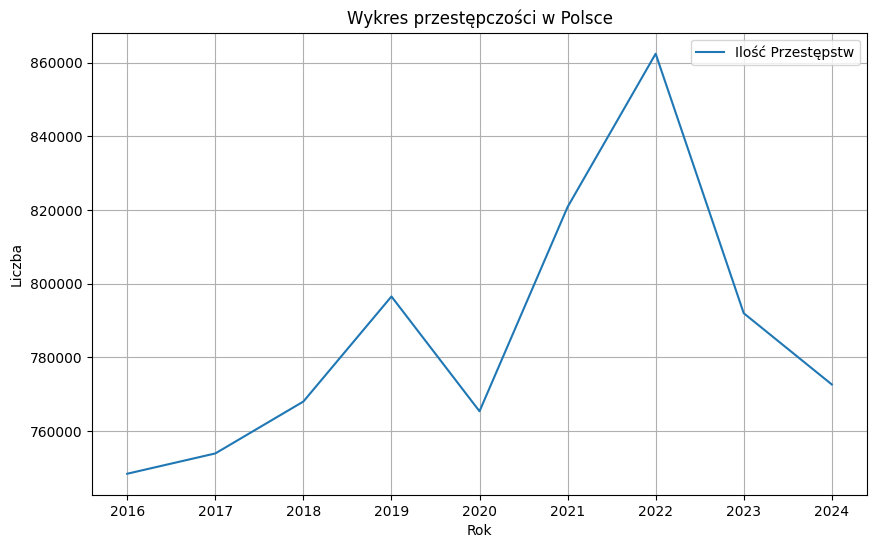

In [604]:
#WYbieramy dane dla Polski 'ogółem' przez lata - kwartał= 0
df_poland = df_final[(df_final['Województwo'] == 'POLSKA') & (df_final['Przestępstwo'] == 'ogółem')  & (df_final['Kwartał'] == 0)]


plt.figure(figsize=(10, 6))
plt.plot(df_poland['Rok'], df_poland['Liczba'], label='Ilość Przestępstw')
plt.xlabel('Rok')
plt.ylabel('Liczba')
plt.title('Wykres przestępczości w Polsce')
plt.legend()
plt.grid(True)
plt.show()

### Analiza 'skoków' przestępczości w 2019 i 2022 roku

#### Rok 2019

In [ ]:
crime_2019 = df_final[(df_final['Województwo'] == 'POLSKA') & (df_final['Przestępstwo'] != 'ogółem') & (df_final['Kwartał'] == 0)]

#nowa tabela przestawna z przestępstwami jako kolumny
crime_2019 = crime_2019.pivot(index='Rok', columns='Przestępstwo', values='Liczba')

#używamy 'diff' - odejmujemy od liczby w domy roku liczbę z roku poprzedniego
crime_2019 = crime_2019.diff()

#bierzemy pod uwagę rok 2019 - różnicę między 2018 a 2019 - szukamy największej różnicy
crime_2019.loc[2019].sort_values(ascending=False)

Przestępstwo
przeciwko mieniu                                                                  29127.0
o charakterze kryminalnym                                                         15451.0
o charakterze gospodarczym                                                         6628.0
przeciwko bezpieczeństwu powszechnemu i bezpieczeństwu w komunikacji - drogowe     5294.0
przeciwko życiu i zdrowiu                                                          -924.0
przeciwko działalności instytucji państwowych oraz samorządu terytorialnego           NaN
przeciwko obrotowi gospodarczemu                                                      NaN
przeciwko obrotowi pieniędzmi i papierami wartościowymi                               NaN
przeciwko rodzinie i opiece                                                           NaN
przeciwko wiarygodności dokumentów                                                    NaN
przeciwko wolności                                                                    N

Najwyzśzy skok w kategorii przestępstw zanotowano w kategorii 'przeciwko mieniu'

In [427]:
woj_2019 = df_final[(df_final['Województwo'] != 'POLSKA') & (df_final['Przestępstwo'] == 'ogółem') & (df_final['Kwartał'] == 0)]
woj_2019 = woj_2019.pivot_table(index='Rok', columns='Województwo', values='Liczba')

woj_2019 = woj_2019.diff()
woj_2019.loc[2019].sort_values(ascending=False)

Województwo
ZACHODNIOPOMORSKIE     11636.0
MAŁOPOLSKIE             5318.0
WIELKOPOLSKIE           3231.0
POMORSKIE               2944.0
DOLNOŚLĄSKIE            2883.0
ŁÓDZKIE                 2565.0
MAZOWIECKIE             2159.0
PODKARPACKIE            1791.0
ŚWIĘTOKRZYSKIE          1069.0
LUBUSKIE                 692.0
WARMIŃSKO-MAZURSKIE      636.0
OPOLSKIE                 612.0
PODLASKIE                200.0
LUBELSKIE               -585.0
ŚLĄSKIE                -1308.0
KUJAWSKO-POMORSKIE     -5335.0
Name: 2019, dtype: float64

Skok w Zachodniopomorskim

#### Rok 2022

In [ ]:
#teraz bieżemy pod uwagę rok 2022
crime_2019.loc[2022].sort_values(ascending=False)

Przestępstwo
o charakterze gospodarczym                                                        38986.0
przeciwko wiarygodności dokumentów                                                26704.0
przeciwko mieniu                                                                  11868.0
przeciwko wymiarowi sprawiedliwości                                                2766.0
o charakterze kryminalnym                                                          1882.0
z ustawy o przeciwdziałaniu narkomanii                                             1809.0
przeciwko obrotowi gospodarczemu                                                    359.0
przeciwko życiu i zdrowiu                                                          -102.0
przeciwko obrotowi pieniędzmi i papierami wartościowymi                           -1026.0
przeciwko wolności                                                                -1123.0
przeciwko bezpieczeństwu powszechnemu i bezpieczeństwu w komunikacji - drogowe    -1748

skok w kategorii 'przestępstwo o charakterze gospodarczym'

In [429]:
woj_2019.loc[2022].sort_values(ascending=False)

Województwo
ŚLĄSKIE                31746.0
MAZOWIECKIE             7497.0
MAŁOPOLSKIE             5254.0
KUJAWSKO-POMORSKIE      4448.0
PODLASKIE               4348.0
POMORSKIE               3580.0
DOLNOŚLĄSKIE            2156.0
WARMIŃSKO-MAZURSKIE     1794.0
ŚWIĘTOKRZYSKIE           880.0
OPOLSKIE                -907.0
LUBELSKIE              -1240.0
WIELKOPOLSKIE          -1367.0
PODKARPACKIE           -2178.0
LUBUSKIE               -2580.0
ZACHODNIOPOMORSKIE     -3247.0
ŁÓDZKIE                -8598.0
Name: 2022, dtype: float64

Skok w województwie Śląskim

## Wykres dla przestępczości w Polsce - kwartalnie

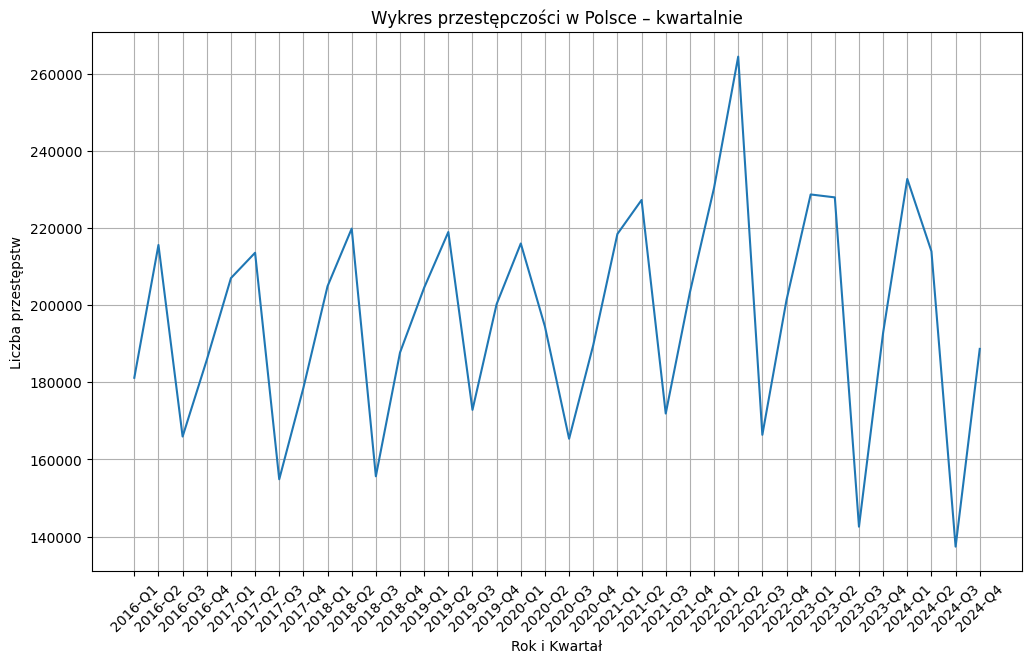

In [609]:
df_quarters = df_final[(df_final['Województwo'] == 'POLSKA') & (df_final['Przestępstwo'] == 'ogółem')  & (df_final['Kwartał'] != 0)]

#tworzymy nową kolumnę zawierającą dany rok i kwartał
df_quarters = df_quarters.sort_values(['Rok', 'Kwartał'])
df_quarters['Data'] = df_quarters['Rok'].astype(str) + '-Q' + df_quarters['Kwartał'].astype(str)


plt.figure(figsize=(12,7))
plt.plot(df_quarters['Data'], df_quarters['Liczba'])
plt.title('Wykres przestępczości w Polsce – kwartalnie')
plt.xlabel('Rok i Kwartał')
plt.ylabel('Liczba przestępstw')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Analiza kwartalna

### Wykres dla sumy przestępstw wedgłu kwartałów 

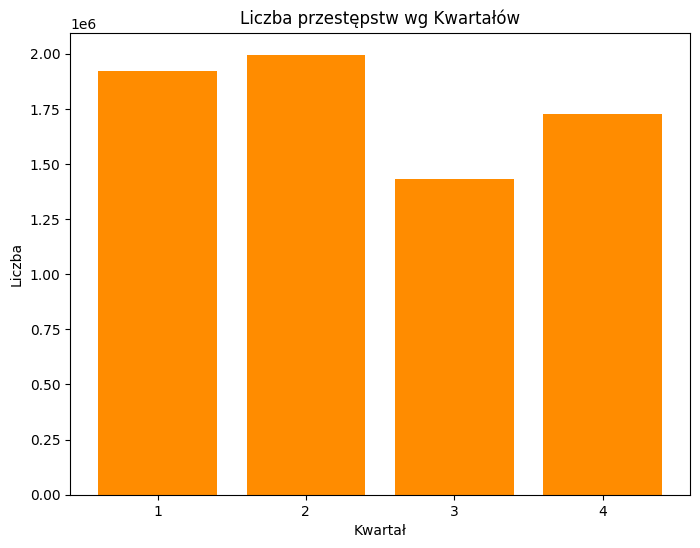

In [614]:
#grupujemy dane Polski według kwartałów i sumujemy
quarters_sum = df_quarters.groupby('Kwartał')['Liczba'].sum()


plt.figure(figsize=(8,6))
plt.bar(quarters_sum.index, quarters_sum.values, color='darkorange')
plt.title('Liczba przestępstw wg Kwartałów')
plt.ylabel('Liczba')
plt.xlabel('Kwartał')
plt.xticks([1, 2, 3, 4], labels=['1', '2', '3', '4'])
plt.show()

### Wykres dla kwartalnych trendów w czasie

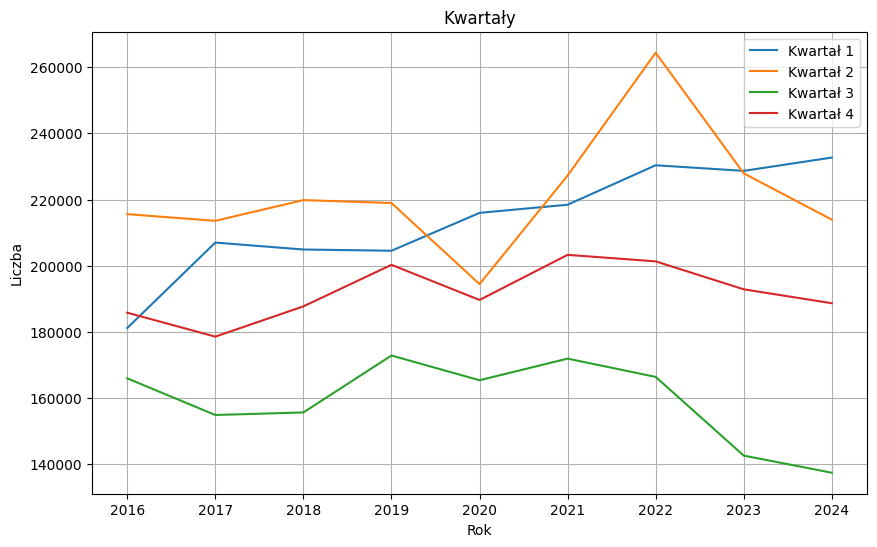

In [555]:
plt.figure(figsize=(10, 6)) 
for i in df_quarters['Kwartał'].unique():
    df = df_quarters[df_quarters["Kwartał"] == i]
    df.set_index('Rok', inplace=True)
    plt.plot(df.index, df['Liczba'], label='Kwartał ' + i.astype(str))


plt.xlabel('Rok')
plt.ylabel('Liczba')
plt.title('Kwartały')
plt.legend()
plt.grid(True)
plt.show()

### Najczęstsze i najrzadsze przestepstwa w Polsce od 2020 roku

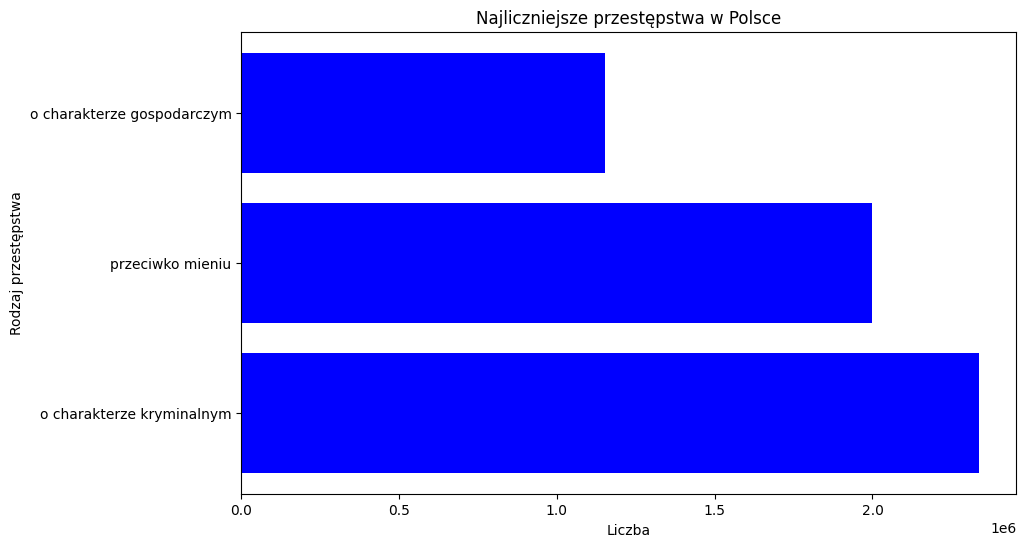

In [636]:
df_top_crimes = df_since_2020[(df_since_2020['Województwo'] == 'POLSKA') & (df_since_2020['Przestępstwo'] != 'ogółem')  & (df_since_2020['Kwartał'] == 0)]

crime_sum = df_top_crimes.groupby('Przestępstwo')['Liczba'].sum()
top3 = crime_sum.nlargest(3)


plt.figure(figsize=(10,6))
plt.barh(top3.index, top3.values, color='blue')
plt.title('Najliczniejsze przestępstwa w Polsce')
plt.xlabel('Liczba')
plt.ylabel('Rodzaj przestępstwa')
plt.show()

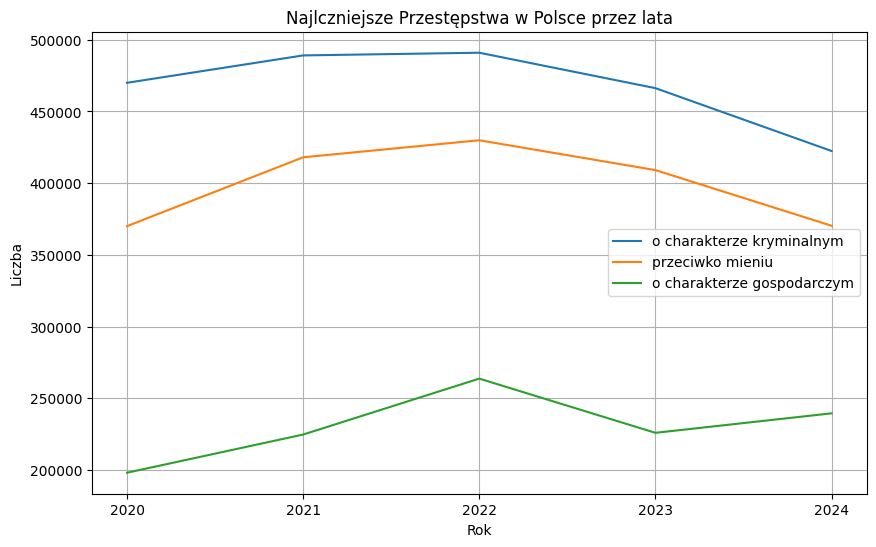

In [569]:
plt.figure(figsize=(10, 6))
for i in range(3):
    df = df_top_crimes[df_top_crimes['Przestępstwo'] == top3.index[i]]
    df.set_index('Rok', inplace=True)
    plt.plot(df.index, df['Liczba'], label=(top3.index[i]))

plt.xlabel('Rok')
plt.ylabel('Liczba')
plt.title('Najlczniejsze Przestępstwa w Polsce przez lata')
plt.xticks(df.index)
plt.legend()
plt.grid(True)
plt.show()

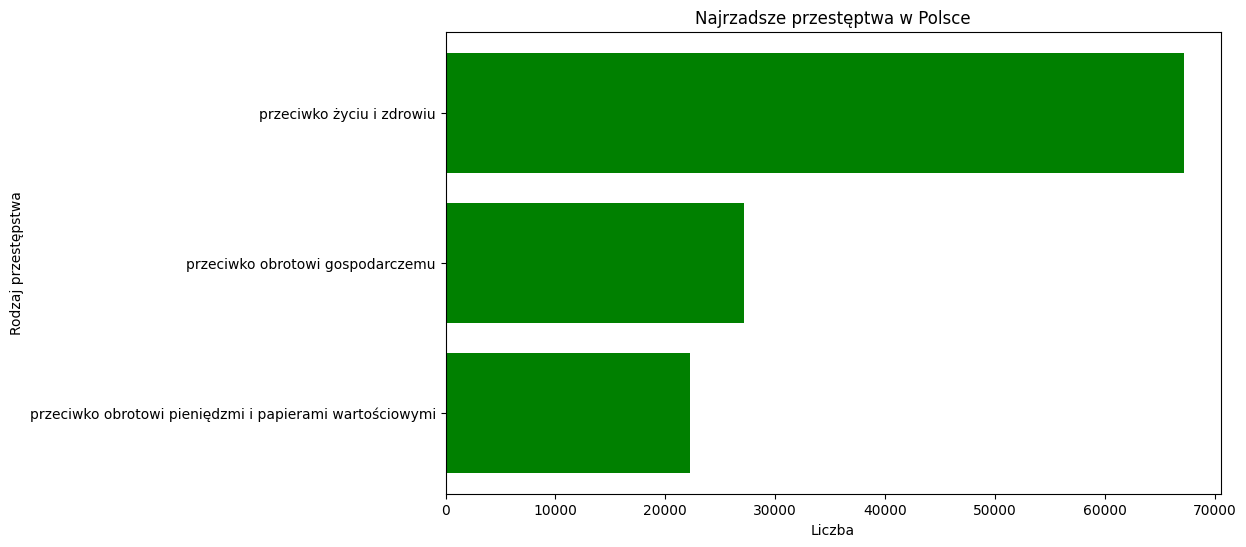

In [582]:
down3 = crime_sum.nsmallest(3)


plt.figure(figsize=(10,6))
plt.barh(down3.index, down3.values, color='green')
plt.title('Najrzadsze przestęptwa w Polsce')
plt.xlabel('Liczba')
plt.ylabel('Rodzaj przestępstwa')
plt.show()

# Analiza przestępczości z podziałem na Województwa

## Mapa Polski dla przestepstw przez wszystkie lata

In [583]:
df_woj = df_final[(df_final["Województwo_ID"] != 9) & (df_final["Przestępstwo_ID"] == 2)& (df_final["Kwartał"] == 0)]
woj_sum = df_woj.groupby('Województwo')['Liczba'].sum().sort_values(ascending=False)

In [584]:
regions = gpd.read_file("wojewodztwa-medium.geojson")
print(regions.head())

   id               nazwa                                           geometry
0   1             śląskie  MULTIPOLYGON (((19.4698 50.9154, 19.4689 50.91...
1   2            opolskie  POLYGON ((17.8122 51.1349, 17.812 51.1335, 17....
2   3       wielkopolskie  POLYGON ((16.8487 53.6287, 16.8496 53.6287, 16...
3   4  zachodniopomorskie  POLYGON ((16.3716 54.4414, 16.372 54.442, 16.3...
4   5      świętokrzyskie  POLYGON ((19.7471 50.866, 19.7474 50.8666, 19....


In [585]:
regions['nazwa']=regions['nazwa'].str.upper()
regions_merged = regions.merge(woj_sum, left_on='nazwa', right_on='Województwo', how='left')
regions_merged

,id,nazwa,geometry,Liczba
0,1,ŚLĄSKIE,"MULTIPOLYGON (((19.4698 50.9154, 19.4689 50.91...",1045054.0
1,2,OPOLSKIE,"POLYGON ((17.8122 51.1349, 17.812 51.1335, 17....",155679.0
2,3,WIELKOPOLSKIE,"POLYGON ((16.8487 53.6287, 16.8496 53.6287, 16...",563492.0
3,4,ZACHODNIOPOMORSKIE,"POLYGON ((16.3716 54.4414, 16.372 54.442, 16.3...",341173.0
4,5,ŚWIĘTOKRZYSKIE,"POLYGON ((19.7471 50.866, 19.7474 50.8666, 19....",188450.0
5,6,KUJAWSKO-POMORSKIE,"POLYGON ((18.6768 53.6907, 18.6785 53.6908, 18...",360993.0
6,7,PODLASKIE,"POLYGON ((21.926 53.0781, 21.9261 53.0783, 21....",160921.0
7,8,DOLNOŚLĄSKIE,"POLYGON ((16.4162 51.7849, 16.419 51.785, 16.4...",696023.0
8,9,PODKARPACKIE,"POLYGON ((22.5437 50.3563, 22.5459 50.3572, 22...",239961.0
9,10,MAŁOPOLSKIE,"POLYGON ((20.5632 50.1997, 20.5625 50.1991, 20...",679003.0


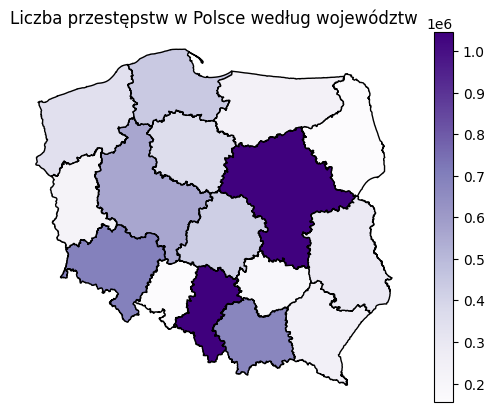

In [589]:
regions_merged.plot(column='Liczba', cmap='Purples', legend=True, edgecolor='black')
plt.title('Liczba przestępstw w Polsce według województw')
plt.axis('off')
plt.show()

## Województwa z największą ilością przestępstw

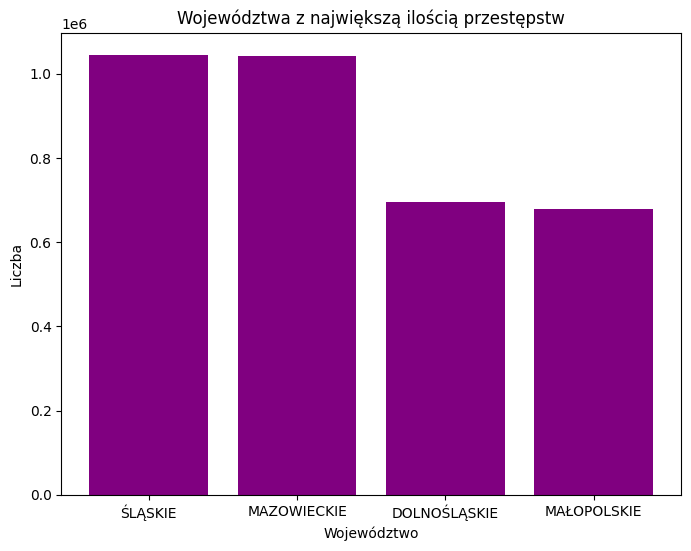

In [630]:
woj_top = woj_sum.nlargest(4)

plt.figure(figsize=(8,6))
plt.bar(woj_top.index, woj_top.values, color='purple')
plt.title('Województwa z największą ilością przestępstw')
plt.ylabel('Liczba')
plt.xlabel('Województwo')
plt.show()

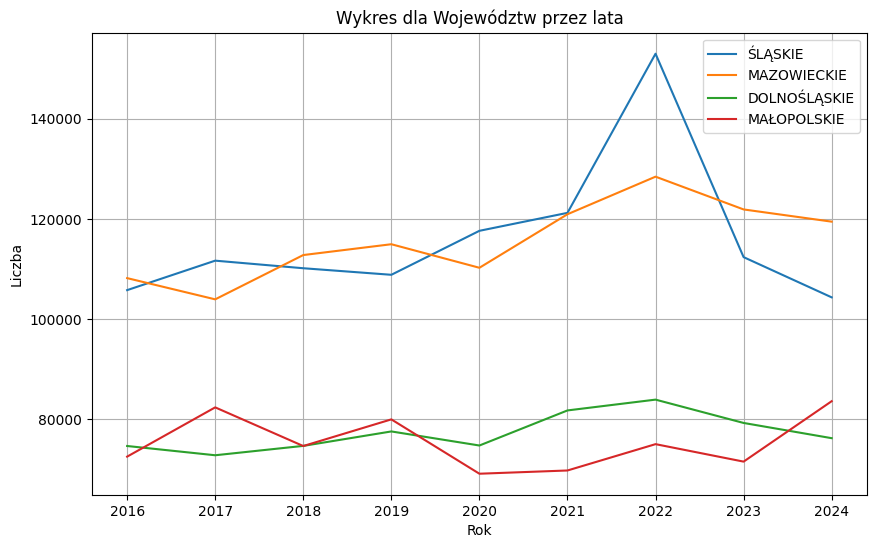

In [635]:
plt.figure(figsize=(10,6))
for i in range(4):
    df = df_woj[df_woj['Województwo'] == woj_top.index[i]]
    df.set_index('Rok', inplace=True)
    plt.plot(df.index, df['Liczba'], label=(woj_top.index[i]))

plt.xlabel('Rok')
plt.ylabel('Liczba')
plt.title('Wykres dla Województw przez lata')
plt.xticks(df.index)
plt.legend()
plt.grid(True)
plt.show()

### Województwa z najmniejszą ilością przestępstw

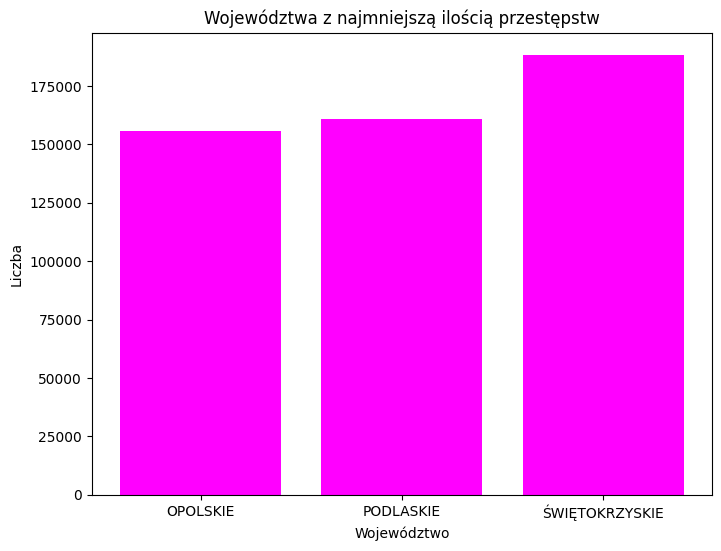

In [632]:
woj_down = woj_sum.nsmallest(3)

plt.figure(figsize=(8,6))
plt.bar(woj_down.index, woj_down.values, color='magenta')
plt.title('Województwa z najmniejszą ilością przestępstw')
plt.ylabel('Liczba')
plt.xlabel('Województwo')
plt.show()